<h1>Airbnb listing data for NYC 2019</h1>

<p>Airbnb is one of the largest short-term rental services in the world.  As such, they have millions of listings, many of which are in metropolitan areas like LA and NYC.  They currently do not have a public API to get listing data, but fortunately a recent <a href=https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data>dataset</a> is available on Kaggle specifically for NYC, and the raw source for this data can be found <a href="http://data.insideairbnb.com/united-states/ny/new-york-city/2019-12-04/data/listings.csv.gz">here</a>.  Data for other cities can also be found <a href="http://insideairbnb.com/get-the-data.html">here</a>.</p>

<p>Let's take a look at the <b>listings.csv</b> first, then we'll get to the time series data in <b>calendar.csv</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
listings_df = pd.read_csv('listings.csv')

/Users/blai/miniconda3/envs/capstone/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<br/>
<p>There are certain columns that have mixed data. Lets take a look at the general structure of the listings as well as those columns.</p>

In [2]:
print(listings_df.info())
print(listings_df.columns)
for col_index in [60, 61, 93, 94]:
    print(listings_df.columns[col_index])
listings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 40.9+ MB
None
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)
price
weekly_price
requires_license
license


id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20191204162729   2019-12-07   
1  3831  https://www.airbnb.com/rooms/3831  20191204162729   2019-12-07   
2  5099  https://www.airbnb.com/rooms/5099  20191204162729   2019-12-06   
3  5121  https://www.airbnb.com/rooms/5121  20191204162729   2019-12-06   
4  5178  https://www.airbnb.com/rooms/5178  20191204162729   2019-12-05   

                                        name  \
0                      Skylit Midtown Castle   
1            Cozy Entire Floor of Brownstone   
2  Large Cozy 1 BR Apartment In Midtown East   
3                            BlissArtsSpace!   
4           Large Furnished Room Near B'way    

                                             summary  \
0  Beautiful, spacious skylit studio in the heart...   
1  Urban retreat: enjoy 500 s.f. floor in 1899 br...   
2  My large 1 bedroom apartment has a true New Yo...   
3                                                NaN   
4  Please don’t expect the luxury here just a bas...   

                                               space  \
0  - Spacious (500+ft²), immaculate and nicely fu...   
1  Greetings!      We own a double-duplex brownst...   
2  I have a large 1 bedroom apartment centrally l...   
3  HELLO EVERYONE AND THANKS FOR VISITING BLISS A...   
4  You will use one large, furnished, private roo...   

                                         description experiences_offered  \
0  Beautiful, spacious skylit studio in the heart...                none   
1  Urban retreat: enjoy 500 s.f. floor in 1899 br...                none   
2  My large 1 bedroom apartment has a true New Yo...                none   
3  HELLO EVERYONE AND THANKS FOR VISITING BLISS A...                none   
4  Please don’t expect the luxury here just a bas...                none   

                               neighborhood_overview  ... instant_bookable  \
0  Centrally located in the heart of Manhattan ju...  ...                f   
1  Just the right mix of urban center and local n...  ...                f   
2  My neighborhood in Midtown East is called Murr...  ...                f   
3                                                NaN  ...                f   
4    Theater district, many restaurants around here.  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f                     moderate   
2                        f                     moderate   
3                        f  strict_14_with_grace_period   
4                        f  strict_14_with_grace_period   

  require_guest_profile_picture require_guest_phone_verification  \
0                             t                                t   
1                             f                                f   
2                             t                                t   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               1   
1                               1   
2                               1   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                            1   
3                                            0   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            1   
4                                            1   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0       

<br/>
<p>As we will see later, those mixed columns are not necessary.  There are also more entries than in the first dataset that we looked at (hopefully for more accurate modeling).  Let's drop the mixed columns and other columns that have irrelevant data, majority incomplete data, or data that can be found in other tables.</p>

In [3]:
# calendar values scraped in a small window between 2019-12-04 and 2019-12-07

listings_clean = listings_df.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'space', \
    'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', \
    'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', \
    'host_name', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', \
    'host_acceptance_rate', 'host_since', 'host_listings_count', 'host_total_listings_count', \
    'host_verifications', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', \
    'host_identity_verified', 'host_neighbourhood', 'street', 'neighbourhood', 'city', 'state', 'zipcode', \
    'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'instant_bookable', \
    'is_business_travel_ready', 'license', 'jurisdiction_names', 'review_scores_value', 'requires_license', \
    'review_scores_communication', 'bed_type', 'weekly_price', 'monthly_price', \
    'security_deposit', 'guests_included', 'minimum_minimum_nights', 'maximum_minimum_nights', \
    'minimum_maximum_nights', 'maximum_maximum_nights', 'calendar_updated', 'has_availability', \
    'calendar_last_scraped', 'number_of_reviews_ltm', 'first_review', 'last_review', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'cancellation_policy', \
    'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', \
    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', \
    'calculated_host_listings_count_shared_rooms', 'cleaning_fee', 'extra_people', \
    'square_feet', 'property_type', 'minimum_nights_avg_ntm', \
    'maximum_nights_avg_ntm', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', \
    'availability_60', 'availability_90', 'availability_365'], axis=1)
print(listings_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            50599 non-null  int64  
 1   summary                       48367 non-null  object 
 2   neighbourhood_cleansed        50599 non-null  object 
 3   neighbourhood_group_cleansed  50599 non-null  object 
 4   latitude                      50599 non-null  float64
 5   longitude                     50599 non-null  float64
 6   room_type                     50599 non-null  object 
 7   accommodates                  50599 non-null  int64  
 8   bathrooms                     50548 non-null  float64
 9   bedrooms                      50536 non-null  float64
 10  beds                          50467 non-null  float64
 11  amenities                     50599 non-null  object 
 12  number_of_reviews             50599 non-null  int64  
 13  r

<br/>
<p>Columns <b>bathrooms, bedrooms, beds</b> have missing data, but thankfully not a lot.  We will try to clean that up.  Let's also rename a couple columns</p>

In [4]:
listings_clean.rename(columns={
    'neighbourhood_cleansed':'neighbourhood',
    'neighbourhood_group_cleansed': 'neighbourhood_group'
}, inplace=True)
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50599 entries, 0 to 50598
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    50599 non-null  int64  
 1   summary               48367 non-null  object 
 2   neighbourhood         50599 non-null  object 
 3   neighbourhood_group   50599 non-null  object 
 4   latitude              50599 non-null  float64
 5   longitude             50599 non-null  float64
 6   room_type             50599 non-null  object 
 7   accommodates          50599 non-null  int64  
 8   bathrooms             50548 non-null  float64
 9   bedrooms              50536 non-null  float64
 10  beds                  50467 non-null  float64
 11  amenities             50599 non-null  object 
 12  number_of_reviews     50599 non-null  int64  
 13  review_scores_rating  39437 non-null  float64
 14  reviews_per_month     40379 non-null  float64
dtypes: float64(7), int6

<br/>
<p>Since the large majority of listings are homes/apts or private rooms, let's keep those listings.</p>

In [5]:
print(listings_clean.room_type.value_counts())
listings_clean = listings_clean.loc[
    (listings_clean.room_type == 'Entire home/apt') |
    (listings_clean.room_type == 'Private room')
]

Entire home/apt    26141
Private room       22785
Shared room         1256
Hotel room           417
Name: room_type, dtype: int64


<br/>
<p>We see some possible outliers for <b>accommodates, bathrooms, bedrooms, beds</b>.</p>

In [6]:
listings_clean.describe()

id      latitude     longitude  accommodates     bathrooms  \
count  4.892600e+04  48926.000000  48926.000000  48926.000000  48879.000000   
mean   2.117010e+07     40.728622    -73.950841      2.890161      1.147538   
std    1.242617e+07      0.054921      0.047503      1.910505      0.427225   
min    2.595000e+03     40.499790    -74.247870      1.000000      0.000000   
25%    9.977018e+06     40.689350    -73.982800      2.000000      1.000000   
50%    2.127600e+07     40.722460    -73.955020      2.000000      1.000000   
75%    3.244168e+07     40.762940    -73.934270      4.000000      1.000000   
max    4.058402e+07     40.916860    -73.712990     25.000000     15.500000   

           bedrooms          beds  number_of_reviews  review_scores_rating  \
count  48863.000000  48798.000000       48926.000000          38259.000000   
mean       1.187872      1.548260          25.091546             93.968243   
std        0.771793      1.124263          47.629989              8.514763   
min        0.000000      0.000000           0.000000             20.000000   
25%        1.000000      1.000000           1.000000             92.000000   
50%        1.000000      1.000000           6.000000             96.000000   
75%        1.000000      2.000000          26.000000            100.000000   
max       21.000000     40.000000         675.000000            100.000000   

       reviews_per_month  
count       39182.000000  
mean            1.401085  
std             1.670326  
min             0.010000  
25%             0.190000  
50%             0.730000  
75%             2.120000  
max            19.950000

<br/>
<p>Check for duplicate latitude and longitude value pairs, which most likely means duplicate listings</p>

In [7]:
# https://stackoverflow.com/questions/44481768/remove-duplicate-rows-from-pandas-dataframe-where-only-some-columns-have-the-sam
# https://stackoverflow.com/questions/16167829/in-pandas-how-can-i-reset-index-without-adding-a-new-column

listings_clean = listings_clean.drop_duplicates(subset=['latitude', 'longitude']).reset_index(drop=True)
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48914 entries, 0 to 48913
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    48914 non-null  int64  
 1   summary               46766 non-null  object 
 2   neighbourhood         48914 non-null  object 
 3   neighbourhood_group   48914 non-null  object 
 4   latitude              48914 non-null  float64
 5   longitude             48914 non-null  float64
 6   room_type             48914 non-null  object 
 7   accommodates          48914 non-null  int64  
 8   bathrooms             48867 non-null  float64
 9   bedrooms              48851 non-null  float64
 10  beds                  48786 non-null  float64
 11  amenities             48914 non-null  object 
 12  number_of_reviews     48914 non-null  int64  
 13  review_scores_rating  38249 non-null  float64
 14  reviews_per_month     39172 non-null  float64
dtypes: float64(7), int6

<br/>
<p>Look at non-numerical columns to see if they can be categorized.</p>

In [8]:
# http://benalexkeen.com/mapping-categorical-data-in-pandas/

print(listings_clean.room_type.value_counts())
print(listings_clean.neighbourhood_group.value_counts())
print(listings_clean.neighbourhood.value_counts())


Entire home/apt    26134
Private room       22780
Name: room_type, dtype: int64
Manhattan        21255
Brooklyn         20194
Queens            5943
Bronx             1149
Staten Island      373
Name: neighbourhood_group, dtype: int64
Williamsburg                  3903
Bedford-Stuyvesant            3823
Harlem                        2691
Bushwick                      2431
Upper West Side               1935
                              ... 
Woodrow                          1
Bay Terrace, Staten Island       1
Country Club                     1
Willowbrook                      1
Fort Wadsworth                   1
Name: neighbourhood, Length: 223, dtype: int64


In [9]:
home_listings = listings_clean.loc[listings_clean.room_type == 'Entire home/apt']
print(home_listings.bedrooms.value_counts())
print(home_listings.beds.value_counts())
print(home_listings.bathrooms.value_counts())

1.0     13018
2.0      6214
0.0      4140
3.0      2034
4.0       476
5.0       133
6.0        41
7.0        17
8.0        10
10.0        5
9.0         4
21.0        1
14.0        1
12.0        1
Name: bedrooms, dtype: int64
1.0     11605
2.0      8097
3.0      3258
4.0      1428
0.0       697
5.0       521
6.0       243
7.0       104
8.0        54
9.0        36
10.0       16
11.0       14
12.0       11
13.0        7
14.0        4
16.0        3
18.0        2
17.0        2
15.0        1
26.0        1
40.0        1
21.0        1
22.0        1
Name: beds, dtype: int64
1.0     22189
2.0      2255
1.5       889
2.5       339
3.0       208
3.5        77
4.0        49
0.0        37
0.5        26
4.5        23
5.0        13
6.0         5
5.5         4
7.0         2
8.0         1
7.5         1
6.5         1
15.5        1
Name: bathrooms, dtype: int64


<p>We see some outliers that may skew any modeling, so let's remove any listing over 10 <b>bedrooms</b>, 12 <b>beds</b>, and 5 <b>bathrooms</b>.  Realistically the vast majority of property owners are not listing super mansions.</p>

In [10]:
listings_clean = listings_clean.loc[
    (listings_clean.bedrooms <= 10) & (listings_clean.beds <=12) & (listings_clean.bathrooms <= 5)
]

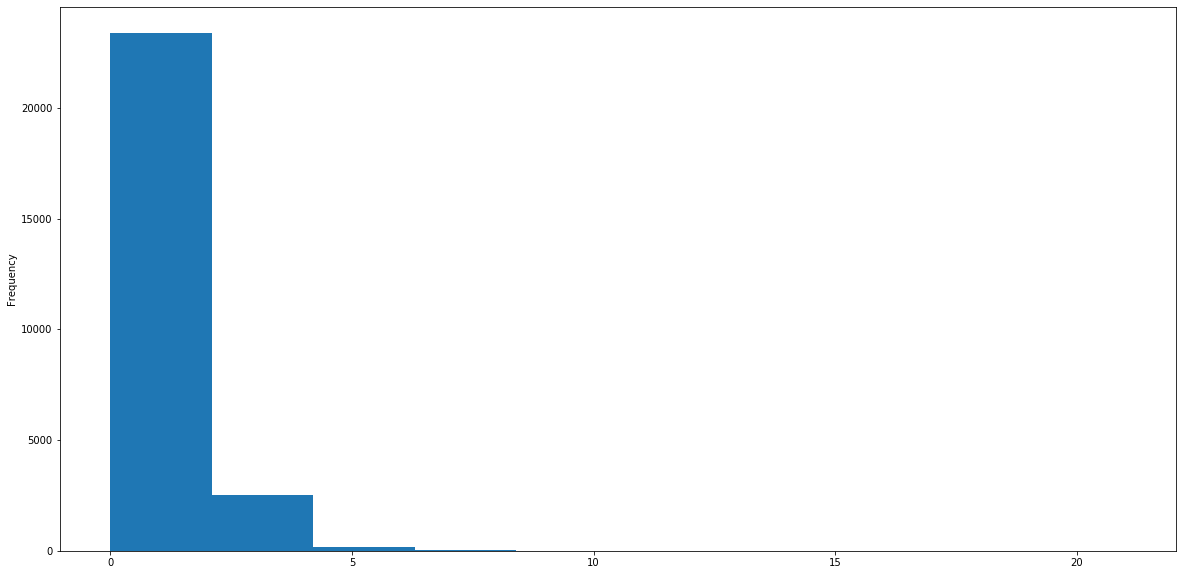

In [11]:
home_listings.bedrooms.plot(kind='hist', figsize=(20, 10))

<p>Home listings are heavily skewed toward single bedroom.  Perhaps we can approximate <b>bedrooms, bathrooms, beds</b> as exponential distributions.</p>
<p>Let's do the same analysis for single room type listings</p>

In [12]:
room_listings = listings_clean.loc[listings_clean.room_type != 'Entire home/apt']
print(room_listings.bedrooms.value_counts())
print(room_listings.beds.value_counts())
print(room_listings.bathrooms.value_counts())

1.0    21426
2.0      563
0.0      457
3.0      123
4.0       44
6.0       11
5.0        7
8.0        1
Name: bedrooms, dtype: int64
1.0     19078
2.0      2295
0.0       656
3.0       409
4.0       134
5.0        28
6.0        16
7.0         8
8.0         4
11.0        1
10.0        1
9.0         1
12.0        1
Name: beds, dtype: int64
1.0    18950
2.0     1708
1.5     1483
3.0      151
2.5      132
0.0       75
0.5       74
4.0       41
3.5       13
5.0        4
4.5        1
Name: bathrooms, dtype: int64


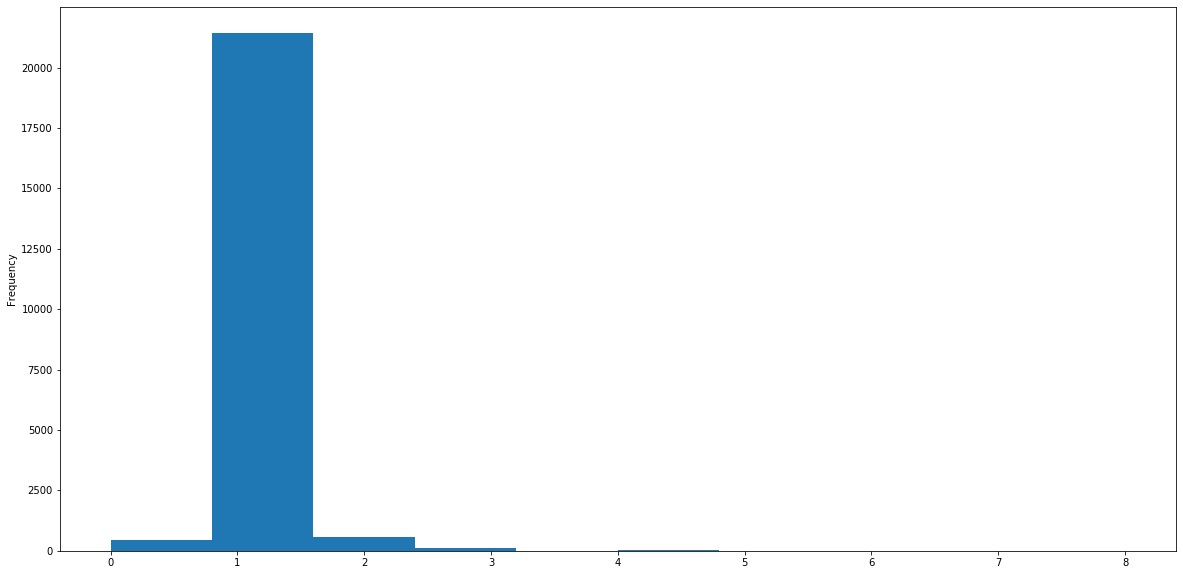

In [13]:
room_listings.bedrooms.plot(kind='hist', figsize=(20, 10))

<p>We get similar results to home listings, which is odd.  Perhaps some single room type listings were incorrectly listed.  That means we may not be able to rely on <b>room_type</b> as a factor in filling in any missing bedroom and bathroom values.</p>

<p>Let's do some data cleaning by filling in the missing <b>bedrooms, bathrooms, beds</b> values (disregarding homes/apts vs. single room since <b>room_type</b> is not always indicative of multiple rooms vs. one room).  0 values can still be considered valid (e.g. studio apt, shared living area, shared bathroom, non-bed type sleeping arrangment).  We will assume that 0.001 degree latitude or longitude <a href=https://gizmodo.com/how-precise-is-one-degree-of-longitude-or-latitude-1631241162">is about 100 m</a>.  Let's average over an area of 200 m radius from listings that have missing data.  We will group by <b>neighbourhood</b> when calculating the mean.</p>

In [14]:
lat_diff = 0.002
long_diff = 0.002
def avg_of_neighbors(row, col_name, col_index):
    item = row[col_index]
    room_type = row[5]
    lat = row[3]
    long = row[4]
    if math.isnan(item):
        item = listings_clean[col_name].loc[(listings_clean.latitude > lat - lat_diff) \
            & (listings_clean.latitude < lat + lat_diff) \
            & (listings_clean.longitude > long - long_diff) \
            & (listings_clean.longitude < long + long_diff)].groupby(by=listings_clean.neighbourhood).mean().round()[0]
        row[col_index] = item
    return row

listings_clean = listings_clean.apply(avg_of_neighbors, col_name='bathrooms', col_index=7, axis=1)
listings_clean = listings_clean.apply(avg_of_neighbors, col_name='bedrooms', col_index=8, axis=1)
listings_clean = listings_clean.apply(avg_of_neighbors, col_name='beds', col_index=9, axis=1)

In [15]:
print(listings_clean.bedrooms.value_counts())
print(listings_clean.bathrooms.value_counts())
print(listings_clean.beds.value_counts())

1.0     34418
2.0      6771
0.0      4593
3.0      2152
4.0       518
5.0       131
6.0        46
7.0        13
8.0         8
10.0        2
9.0         2
Name: bedrooms, dtype: int64
1.0    41080
2.0     3960
1.5     2372
2.5      467
3.0      354
0.0      110
0.5      100
3.5       88
4.0       85
4.5       24
5.0       14
Name: bathrooms, dtype: int64
1.0     30644
2.0     10381
3.0      3667
4.0      1562
0.0      1353
5.0       546
6.0       258
7.0       112
8.0        57
9.0        36
11.0       15
10.0       14
12.0        9
Name: beds, dtype: int64


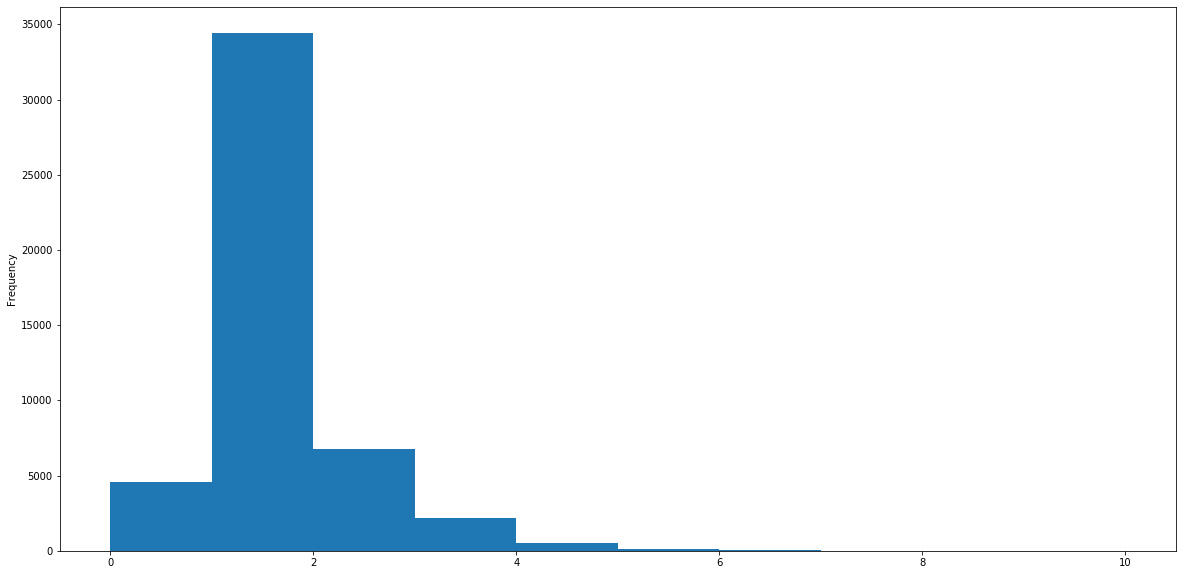

In [16]:
listings_clean.bedrooms.plot(kind='hist', figsize=(20, 10))

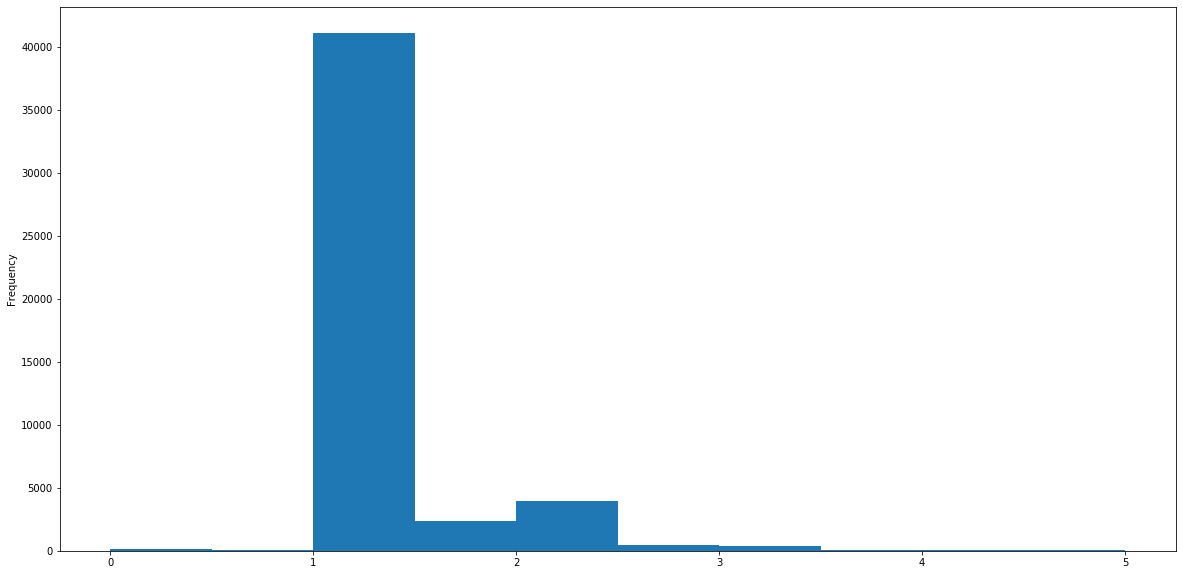

In [17]:
listings_clean.bathrooms.plot(kind='hist', figsize=(20, 10))

<p>After <b>bedrooms, bathrooms, beds</b> cleanup, we are able to see a bit more detail in the distributions.  They are approximately exponential (again skewed toward 1).</p>

<p>Final check on the listings for any missing data.</p>

In [18]:
listings_clean.info()
print(listings_clean.neighbourhood_group.value_counts())
print(listings_clean.neighbourhood.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48654 entries, 0 to 48913
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    48654 non-null  int64  
 1   summary               46577 non-null  object 
 2   neighbourhood         48654 non-null  object 
 3   neighbourhood_group   48654 non-null  object 
 4   latitude              48654 non-null  float64
 5   longitude             48654 non-null  float64
 6   room_type             48654 non-null  object 
 7   accommodates          48654 non-null  int64  
 8   bathrooms             48654 non-null  float64
 9   bedrooms              48654 non-null  float64
 10  beds                  48654 non-null  float64
 11  amenities             48654 non-null  object 
 12  number_of_reviews     48654 non-null  int64  
 13  review_scores_rating  38120 non-null  float64
 14  reviews_per_month     39034 non-null  float64
dtypes: float64(7), int6

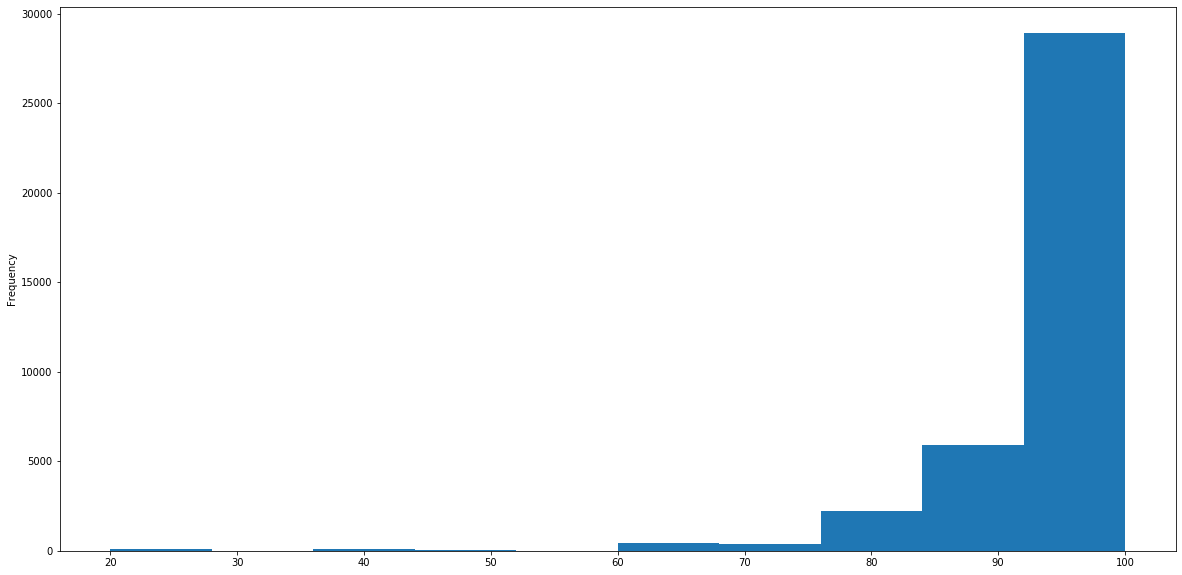

In [19]:
listings_clean.review_scores_rating.plot(kind='hist', figsize=(20, 10))

In [20]:
listings_clean['review_scores_rating'].fillna(listings_clean.review_scores_rating.mean(), inplace=True)

<p>One hot encode the <b>neighbourhood</b> values.  Drop non-numerical columns as well as listing IDs (which do not have any meaning for modeling).  Also convert <b>room_type</b> to 1 and 0 valued <b>entire_home_apt</b>.</p>

In [21]:
# def cleanup_neighbourhood(val):
#     return val.replace(' ', '_').lower()

# listings_clean['neighbourhood'] = listings_clean.neighbourhood.apply(cleanup_neighbourhood)
# neighbourhood_one_hot = pd.get_dummies(listings_clean.neighbourhood)
# listings_clean = listings_clean.join(neighbourhood_one_hot)

In [22]:
listings_clean['entire_home_apt'] = np.where(listings_clean.room_type == 'Entire home/apt', 1, 0)

In [23]:
import re

def cleanup_amenities(val): 
    val = val.replace('"', '')
    val = re.sub(r'translation missing[^,]+,', '', val)
    val = re.sub(r',translation missing[^}]+}', '', val)
    val = val.replace('{', '').replace('}', '').replace(' ', '_').lower()
    return val.split(',')
    
listings_clean['amenities'] = listings_clean['amenities'].apply(cleanup_amenities)

In [24]:
amenities_sparse = listings_clean.amenities.str.join('|').str.get_dummies()
listings_clean = listings_clean.join(amenities_sparse)

In [25]:
listings_clean.head()

id                                            summary    neighbourhood  \
0  2595  Beautiful, spacious skylit studio in the heart...          Midtown   
1  3831  Urban retreat: enjoy 500 s.f. floor in 1899 br...     Clinton Hill   
2  5099  My large 1 bedroom apartment has a true New Yo...      Murray Hill   
4  5178  Please don’t expect the luxury here just a bas...   Hell's Kitchen   
5  5203  Our best guests are seeking a safe, clean, spa...  Upper West Side   

  neighbourhood_group  latitude  longitude        room_type  accommodates  \
0           Manhattan  40.75362  -73.98377  Entire home/apt             1   
1            Brooklyn  40.68514  -73.95976  Entire home/apt             3   
2           Manhattan  40.74767  -73.97500  Entire home/apt             2   
4           Manhattan  40.76489  -73.98493     Private room             2   
5           Manhattan  40.80178  -73.96723     Private room             1   

   bathrooms  bedrooms  ...  well-lit_path_to_entrance wheelchair_accessible  \
0        1.0       0.0  ...                          1                     0   
1        1.0       1.0  ...                          0                     0   
2        1.0       1.0  ...                          0                     0   
4        1.0       1.0  ...                          0                     0   
5        1.0       1.0  ...                          0                     0   

   wide_clearance_to_shower  wide_doorway_to_guest_bathroom  wide_entrance  \
0                         0                               0              0   
1                         0                               0              0   
2                         0                               0              0   
4                         0                               0              0   
5                         0                               0              0   

   wide_entrance_for_guests  wide_entryway  wide_hallways  wifi  window_guards  
0                         1              0              0     1              0  
1                         0              0              0     1              0  
2                         0              0              0     1              0  
4                         0              0              0     1              0  
5                         0              0              0     1              0  

[5 rows x 145 columns]

<br/>
<p>Now let's take a look at the time series data for availability, price, and nights.  <a href=http://data.insideairbnb.com/united-states/ny/new-york-city/2019-12-04/data/calendar.csv.gz><b>Calendar.csv</b></a> comes from the same <a href="http://insideairbnb.com/get-the-data.html">source</a> as <b>listings.csv</b></p>.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
calendar_df = pd.read_csv('calendar.csv', parse_dates=['date'])

<br/>
<p>This time we don't have to deal with columns of mixed data, nor do we have a large number of columns like in the <b>listings_clean</b> table.  We do, however, have over 18 million entries, which makes sense given that this is time series data over a year for 50,000+ listings.  We will have to clean up availability and price.</p>

In [27]:
print(calendar_df.info())
print(calendar_df.columns)
calendar_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18470156 entries, 0 to 18470155
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 986.4+ MB
None
Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')


listing_id       date available    price adjusted_price  minimum_nights  \
0       19812 2019-12-05         f  $105.00        $105.00             3.0   
1        2595 2019-12-06         f  $175.00        $175.00            10.0   
2        2595 2019-12-07         f  $175.00        $175.00            10.0   
3        2595 2019-12-08         f  $175.00        $175.00            10.0   
4        2595 2019-12-09         f  $175.00        $175.00            10.0   

   maximum_nights  
0            90.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0

<br/>
<p>On checking for equal distribution of all listings over the relevant time period (assumed for this step to be a year), we see a problem with <b>listing_id</b> 15268792.  Let's just remove it, since it is not worth the effort to build a year's worth of data for that one listing.</p>

In [28]:
print(calendar_df.listing_id.value_counts())
calendar_clean = calendar_df[calendar_df.listing_id != 15268792]


25512622    368
32678719    368
28138840    368
30069091    368
24285044    368
           ... 
27926502    365
18992796    365
21677053    365
30226855    365
15268792      6
Name: listing_id, Length: 50599, dtype: int64


<br/>
<p>Since this data set was captured in 2019, we must clean up dates that have year 2020.  Then drop any duplicate <b>listing_id, date</b> combos.  Then check that all days add up to a calendar year for each <b>listing_id</b>.</p>

In [29]:
# https://stackoverflow.com/questions/50674011/replace-the-year-in-pandas-datetime-column
# https://stackoverflow.com/questions/28773342/truncate-timestamp-column-to-hour-precision-in-pandas-dataframe

calendar_clean['date'] = calendar_clean['date'].mask(calendar_clean['date'].dt.year == 2020,
                            calendar_clean['date'] - pd.to_timedelta(365, unit='D') + pd.to_timedelta(12, unit='h'))
calendar_clean['date'] = calendar_clean['date'].dt.floor('D')

/Users/blai/miniconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/blai/miniconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
calendar_clean = calendar_clean.drop_duplicates(subset=['listing_id', 'date']).reset_index(drop=True)
print(calendar_clean.listing_id.value_counts())

327521      365
7756711     365
31877537    365
14961122    365
201992      365
           ... 
37055580    365
13186007    365
18549136    365
34646244    365
30226855    365
Name: listing_id, Length: 50598, dtype: int64


<br/>
<p>Verify that all listing_id values can be found in the <b>listings_clean</b> table.  If not, then remove rows with listing_id values don't exist in the other table.</p>

In [31]:
# https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe

ids_match = calendar_clean.listing_id.isin(listings_clean.id)
print(ids_match.value_counts())

True     17758345
False      709925
Name: listing_id, dtype: int64


In [32]:
calendar_clean = calendar_clean[calendar_clean.listing_id.isin(listings_clean.id)]
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17758345 entries, 0 to 18468269
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.1+ GB


<br/>
<p>Translate all <b>available</b> values to 1 (available) or 0 (unavailable).</p>

In [33]:
print(calendar_clean.available.value_counts())
calendar_clean['available'] = np.where(calendar_clean.available == 't', 1, 0)
print(calendar_clean.available.value_counts())

f    11990442
t     5767903
Name: available, dtype: int64
0    11990442
1     5767903
Name: available, dtype: int64


<br/>
<p>Less than 1% of the entries have <b>adjusted_price</b> not equal to <b>price</b>, but we will use <b>adjusted_price</b> anyway and clean it up to be numerical</p>

In [34]:
calendar_clean[calendar_clean.price != calendar_clean.adjusted_price]

listing_id       date  available    price adjusted_price  \
8232           20734 2019-12-06          0  $134.00        $127.00   
8419           20734 2019-12-07          0  $134.00        $127.00   
8420           20734 2019-12-08          0  $134.00        $127.00   
8421           20734 2019-12-09          0  $134.00        $127.00   
8422           20734 2019-12-10          0  $134.00        $127.00   
...              ...        ...        ...      ...            ...   
18402175    40482221 2019-12-01          0   $74.00         $63.00   
18402176    40482221 2019-12-02          0   $74.00         $63.00   
18402177    40482221 2019-12-03          0   $74.00         $63.00   
18402178    40482221 2019-12-04          0   $74.00         $63.00   
18402179    40482221 2019-12-05          0   $79.00         $67.00   

          minimum_nights  maximum_nights  
8232                 3.0            29.0  
8419                 3.0            29.0  
8420                 3.0            29.0  
8421                 3.0            29.0  
8422                 3.0            29.0  
...                  ...             ...  
18402175             1.0           365.0  
18402176             1.0           365.0  
18402177             1.0           365.0  
18402178             1.0           365.0  
18402179             1.0           365.0  

[111633 rows x 7 columns]

In [35]:
calendar_clean['price_cleansed'] = calendar_clean.adjusted_price\
.str.replace('$', '').str.replace(',', '').astype('float')

In [36]:
calendar_clean = calendar_clean.drop(['adjusted_price', 'price'], axis=1)
calendar_clean.rename(columns={'price_cleansed': 'price'}, inplace=True)

<br/>
<p>Now is a good time to check the state of the table.  All columns except for <b>maximum_nights</b> seem to have useful data.  The large majority of listings allowing over 1000 nights for a short-term rental means that, for practical purposes, it is limitless.</p>

In [37]:
calendar_clean.info()
calendar_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17758345 entries, 0 to 18468269
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   minimum_nights  float64       
 4   maximum_nights  float64       
 5   price           float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 948.4 MB


listing_id       date  available  minimum_nights  maximum_nights  price
0       19812 2019-12-05          0             3.0            90.0  105.0
1        2595 2019-12-06          0            10.0          1125.0  175.0
2        2595 2019-12-07          0            10.0          1125.0  175.0
3        2595 2019-12-08          0            10.0          1125.0  175.0
4        2595 2019-12-09          0            10.0          1125.0  175.0

In [38]:
calendar_clean.describe()

listing_id     available  minimum_nights  maximum_nights  \
count  1.775834e+07  1.775834e+07    1.775772e+07    1.775772e+07   
mean   2.114076e+07  3.247996e-01    8.592398e+00    2.748719e+05   
std    1.239078e+07  4.682999e-01    3.037026e+01    2.423063e+07   
min    2.595000e+03  0.000000e+00    1.000000e+00    1.000000e+00   
25%    9.979270e+06  0.000000e+00    2.000000e+00    2.900000e+01   
50%    2.125183e+07  0.000000e+00    3.000000e+00    1.125000e+03   
75%    3.234744e+07  1.000000e+00    5.000000e+00    1.125000e+03   
max    4.058402e+07  1.000000e+00    3.456000e+03    2.147484e+09   

              price  
count  1.775745e+07  
mean   1.560488e+02  
std    2.568249e+02  
min    0.000000e+00  
25%    7.000000e+01  
50%    1.100000e+02  
75%    1.800000e+02  
max    1.000000e+04

In [39]:
calendar_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17758345 entries, 0 to 18468269
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   minimum_nights  float64       
 4   maximum_nights  float64       
 5   price           float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 948.4 MB


<br/>
<p>Since travel patterns are usually seasonal, let's average availability, min nights required, and price over each season and the whole year.</p>

In [40]:
available_year_avg = calendar_clean.groupby(by='listing_id').available.mean()
available_winter_avg = calendar_clean[(calendar_clean.date.dt.month == 1) | (calendar_clean.date.dt.month == 2) \
    | (calendar_clean.date.dt.month == 12)].groupby(by='listing_id').available.mean()
available_spring_avg = calendar_clean[(calendar_clean.date.dt.month >= 3) & (calendar_clean.date.dt.month <= 5)]\
.groupby(by='listing_id').available.mean()
available_summer_avg = calendar_clean[(calendar_clean.date.dt.month >= 6) & (calendar_clean.date.dt.month <= 8)]\
.groupby(by='listing_id').available.mean()
available_fall_avg = calendar_clean[(calendar_clean.date.dt.month >= 9) & (calendar_clean.date.dt.month <= 11)]\
.groupby(by='listing_id').available.mean()
available_jan_avg = calendar_clean[calendar_clean.date.dt.month == 1].groupby(by='listing_id').available.mean()
available_jun_avg = calendar_clean[calendar_clean.date.dt.month == 6].groupby(by='listing_id').available.mean()
available_dec_avg = calendar_clean[calendar_clean.date.dt.month == 12].groupby(by='listing_id').available.mean()

calendar_averages = pd.DataFrame(available_year_avg)
calendar_averages.rename(columns={'available': 'available_year_avg'}, inplace=True)
calendar_averages['available_winter_avg'] = available_winter_avg
calendar_averages['available_spring_avg'] = available_spring_avg
calendar_averages['available_summer_avg'] = available_summer_avg
calendar_averages['available_fall_avg'] = available_fall_avg
calendar_averages['available_jan_avg'] = available_jan_avg
calendar_averages['available_jun_avg'] = available_jun_avg
calendar_averages['available_dec_avg'] = available_dec_avg


In [41]:
min_nights_year_avg = calendar_clean.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_winter_avg = calendar_clean[(calendar_clean.date.dt.month == 1) | (calendar_clean.date.dt.month == 2) \
    | (calendar_clean.date.dt.month == 12)].groupby(by='listing_id')['minimum_nights'].mean()
min_nights_spring_avg = calendar_clean[(calendar_clean.date.dt.month >= 3) & (calendar_clean.date.dt.month <= 5)]\
.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_summer_avg = calendar_clean[(calendar_clean.date.dt.month >= 6) & (calendar_clean.date.dt.month <= 8)]\
.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_fall_avg = calendar_clean[(calendar_clean.date.dt.month >= 9) & (calendar_clean.date.dt.month <= 11)]\
.groupby(by='listing_id')['minimum_nights'].mean()
min_nights_jan_avg = calendar_clean[calendar_clean.date.dt.month == 1].groupby(by='listing_id')['minimum_nights'].mean()
min_nights_jun_avg = calendar_clean[calendar_clean.date.dt.month == 6].groupby(by='listing_id')['minimum_nights'].mean()
min_nights_dec_avg = calendar_clean[calendar_clean.date.dt.month == 12].groupby(by='listing_id')['minimum_nights'].mean()

calendar_averages['min_nights_year_avg'] = min_nights_year_avg
calendar_averages['min_nights_winter_avg'] = min_nights_winter_avg
calendar_averages['min_nights_spring_avg'] = min_nights_spring_avg
calendar_averages['min_nights_summer_avg'] = min_nights_summer_avg
calendar_averages['min_nights_fall_avg'] = min_nights_fall_avg
calendar_averages['min_nights_jan_avg'] = min_nights_jan_avg
calendar_averages['min_nights_jun_avg'] = min_nights_jun_avg
calendar_averages['min_nights_dec_avg'] = min_nights_dec_avg

In [42]:
price_year_avg = calendar_clean.groupby(by='listing_id')['price'].mean()
price_winter_avg = calendar_clean[(calendar_clean.date.dt.month == 1) | (calendar_clean.date.dt.month == 2) \
    | (calendar_clean.date.dt.month == 12)].groupby(by='listing_id')['price'].mean()
price_spring_avg = calendar_clean[(calendar_clean.date.dt.month >= 3) & (calendar_clean.date.dt.month <= 5)]\
.groupby(by='listing_id')['price'].mean()
price_summer_avg = calendar_clean[(calendar_clean.date.dt.month >= 6) & (calendar_clean.date.dt.month <= 8)]\
.groupby(by='listing_id')['price'].mean()
price_fall_avg = calendar_clean[(calendar_clean.date.dt.month >= 9) & (calendar_clean.date.dt.month <= 11)]\
.groupby(by='listing_id')['price'].mean()
price_jan_avg = calendar_clean[calendar_clean.date.dt.month == 1].groupby(by='listing_id')['price'].mean()
price_jun_avg = calendar_clean[calendar_clean.date.dt.month == 6].groupby(by='listing_id')['price'].mean()
price_dec_avg = calendar_clean[calendar_clean.date.dt.month == 12].groupby(by='listing_id')['price'].mean()

calendar_averages['price_year_avg'] = price_year_avg
calendar_averages['price_winter_avg'] = price_winter_avg
calendar_averages['price_spring_avg'] = price_spring_avg
calendar_averages['price_summer_avg'] = price_summer_avg
calendar_averages['price_fall_avg'] = price_fall_avg
calendar_averages['price_jan_avg'] = price_jan_avg
calendar_averages['price_jun_avg'] = price_jun_avg
calendar_averages['price_dec_avg'] = price_dec_avg

In [43]:
calendar_averages.info()
calendar_averages.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48653 entries, 2595 to 40584021
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   available_year_avg     48653 non-null  float64
 1   available_winter_avg   48653 non-null  float64
 2   available_spring_avg   48653 non-null  float64
 3   available_summer_avg   48653 non-null  float64
 4   available_fall_avg     48653 non-null  float64
 5   available_jan_avg      48653 non-null  float64
 6   available_jun_avg      48653 non-null  float64
 7   available_dec_avg      48653 non-null  float64
 8   min_nights_year_avg    48653 non-null  float64
 9   min_nights_winter_avg  48653 non-null  float64
 10  min_nights_spring_avg  48653 non-null  float64
 11  min_nights_summer_avg  48653 non-null  float64
 12  min_nights_fall_avg    48653 non-null  float64
 13  min_nights_jan_avg     48653 non-null  float64
 14  min_nights_jun_avg     48653 non-null  float64
 

available_year_avg  available_winter_avg  available_spring_avg  \
count        48653.000000          48653.000000          48653.000000   
mean             0.324800              0.367686              0.366178   
std              0.371980              0.368098              0.447648   
min              0.000000              0.000000              0.000000   
25%              0.000000              0.000000              0.000000   
50%              0.167123              0.266667              0.043478   
75%              0.665753              0.722222              1.000000   
max              1.000000              1.000000              1.000000   

       available_summer_avg  available_fall_avg  available_jan_avg  \
count          48653.000000        48653.000000       48653.000000   
mean               0.292422            0.273285           0.416534   
std                0.440315            0.440492           0.444207   
min                0.000000            0.000000           0.000000   
25%                0.000000            0.000000           0.000000   
50%                0.000000            0.000000           0.129032   
75%                0.956522            0.989011           0.935484   
max                1.000000            1.000000           1.000000   

       available_jun_avg  available_dec_avg  min_nights_year_avg  \
count       48653.000000       48653.000000         48653.000000   
mean            0.292684           0.239441             8.592328   
std             0.438403           0.294223            28.881280   
min             0.000000           0.000000             1.000000   
25%             0.000000           0.000000             1.991781   
50%             0.000000           0.129032             3.000000   
75%             1.000000           0.419355             5.000000   
max             1.000000           1.000000          1494.104110   

       min_nights_winter_avg  ...  min_nights_jun_avg  min_nights_dec_avg  \
count           48653.000000  ...        48653.000000        48653.000000   
mean                8.046683  ...            8.853276            7.725376   
std                25.667699  ...           33.876058           23.435944   
min                 1.000000  ...            1.000000            1.000000   
25%                 1.966667  ...            2.000000            1.903226   
50%                 3.000000  ...            3.000000            3.000000   
75%                 5.000000  ...            5.000000            5.000000   
max              1997.166667  ...         3337.000000         1574.225806   

       price_year_avg  price_winter_avg  price_spring_avg  price_summer_avg  \
count    48653.000000      48653.000000      48651.000000      48653.000000   
mean       156.048575        149.758814        155.145125        157.516932   
std        236.460285        228.505797        236.534638        233.831249   
min          0.000000          0.000000          0.000000          0.000000   
25%         70.000000         69.000000         70.000000         70.000000   
50%        110.000000        108.166667        110.000000        110.673913   
75%        180.000000        175.000000        180.000000        181.000000   
max      10000.000000      10000.000000      10000.000000      10000.000000   

       price_fall_avg  price_jan_avg  price_jun_avg  price_dec_avg  
count    48650.000000   48651.000000   48653.000000   48653.000000  
mean       161.701132     146.408156     158.008192     156.069265  
std        291.482058     228.250163     234.747373     234.521394  
min          0.000000       0.000000       0.000000       0.000000  
25%         70.000000      67.903226      70.000000      70.000000  
50%        110.000000     105.000000     110.666667     110.516129  
75%        180.000000     170.000000     181.100000     180.000000  
max      10000.000000   10000.000000   10000.000000   10000.000000  

[8 rows x 24 columns]

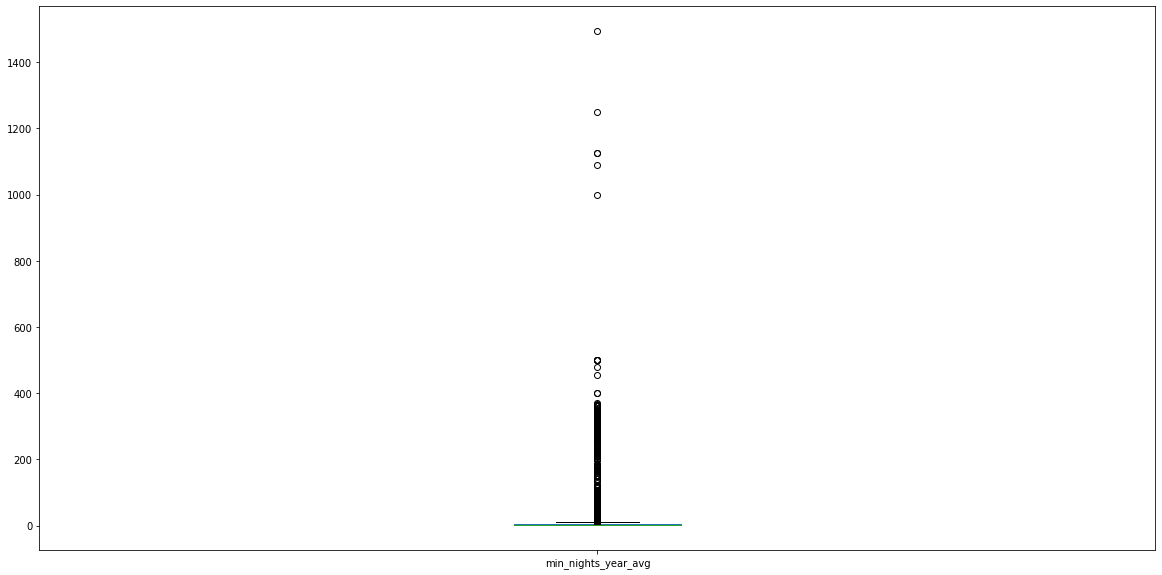

In [44]:
calendar_averages.min_nights_year_avg.plot(kind='box', figsize=(20, 10))

<p>1000+ <b>minimum_nights</b> is extremely high and unrealistic.  Box plot shows outliers above 10 nights, and the 3rd quartile level is 5 nights.</p>

<p>Let's drop any entry that averages over 30 minimum nights.</p>

In [50]:
calendar_averages = calendar_averages.loc[
    (calendar_averages.min_nights_year_avg <= 30) & 
    (calendar_averages.min_nights_winter_avg <= 30) &
    (calendar_averages.min_nights_spring_avg <= 30) &
    (calendar_averages.min_nights_summer_avg <= 30) &
    (calendar_averages.min_nights_fall_avg <= 30) &
    (calendar_averages.min_nights_jan_avg <= 30) &
    (calendar_averages.min_nights_jun_avg <= 30) &
    (calendar_averages.min_nights_dec_avg <= 30)
]

<br/>
<p>The box plot shows clear outliers above \$1000 average nightly price, and the 3rd quartile level is \$180.  Let's drop all listings above \$1000</p>

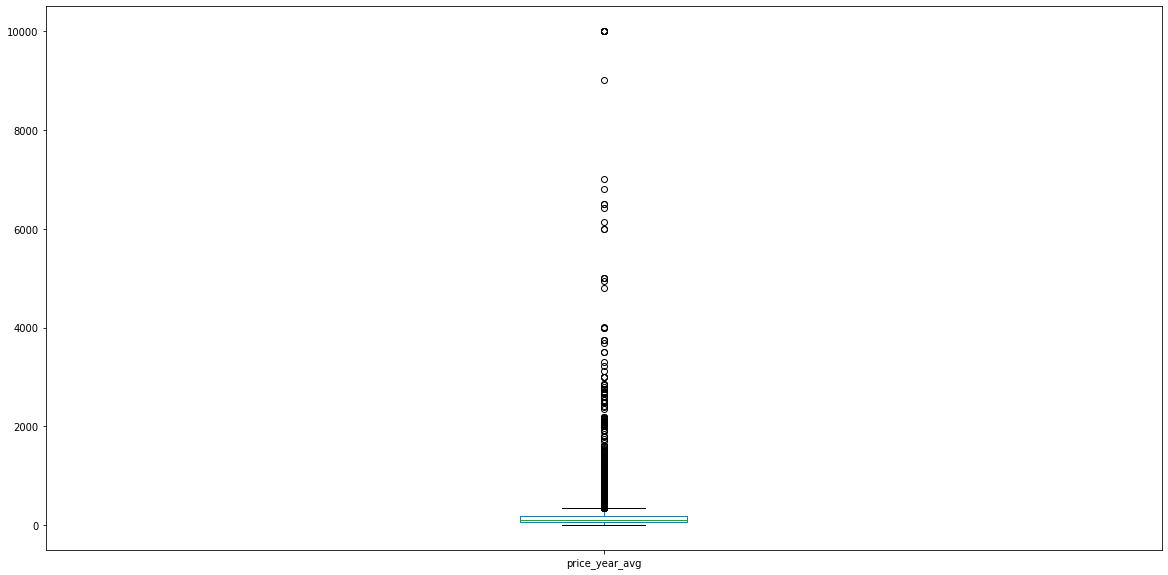

In [51]:
calendar_averages.price_year_avg.plot(kind='box', figsize=(20, 10))

In [53]:
calendar_averages = calendar_averages.loc[
    (calendar_averages.price_year_avg <= 1000) &
    (calendar_averages.price_winter_avg <= 1000) &
    (calendar_averages.price_spring_avg <= 1000) &
    (calendar_averages.price_summer_avg <= 1000) &
    (calendar_averages.price_fall_avg <= 1000) &
    (calendar_averages.price_jan_avg <= 1000) &
    (calendar_averages.price_jun_avg <= 1000) &
    (calendar_averages.price_dec_avg <= 1000)
]

In [54]:
calendar_averages.info()
calendar_averages.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47134 entries, 2595 to 40584021
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   available_year_avg     47134 non-null  float64
 1   available_winter_avg   47134 non-null  float64
 2   available_spring_avg   47134 non-null  float64
 3   available_summer_avg   47134 non-null  float64
 4   available_fall_avg     47134 non-null  float64
 5   available_jan_avg      47134 non-null  float64
 6   available_jun_avg      47134 non-null  float64
 7   available_dec_avg      47134 non-null  float64
 8   min_nights_year_avg    47134 non-null  float64
 9   min_nights_winter_avg  47134 non-null  float64
 10  min_nights_spring_avg  47134 non-null  float64
 11  min_nights_summer_avg  47134 non-null  float64
 12  min_nights_fall_avg    47134 non-null  float64
 13  min_nights_jan_avg     47134 non-null  float64
 14  min_nights_jun_avg     47134 non-null  float64
 

available_year_avg  available_winter_avg  available_spring_avg  \
count        47134.000000          47134.000000          47134.000000   
mean             0.315787              0.362074              0.357377   
std              0.368743              0.366160              0.445082   
min              0.000000              0.000000              0.000000   
25%              0.000000              0.000000              0.000000   
50%              0.153425              0.244444              0.043478   
75%              0.624658              0.722222              0.989130   
max              1.000000              1.000000              1.000000   

       available_summer_avg  available_fall_avg  available_jan_avg  \
count          47134.000000        47134.000000       47134.000000   
mean               0.281152            0.262978           0.411281   
std                0.434930            0.435150           0.442726   
min                0.000000            0.000000           0.000000   
25%                0.000000            0.000000           0.000000   
50%                0.000000            0.000000           0.129032   
75%                0.902174            0.923077           0.935484   
max                1.000000            1.000000           1.000000   

       available_jun_avg  available_dec_avg  min_nights_year_avg  \
count       47134.000000       47134.000000         47134.000000   
mean            0.281733           0.233611             5.613992   
std             0.432902           0.289838             8.156074   
min             0.000000           0.000000             1.000000   
25%             0.000000           0.000000             1.600000   
50%             0.000000           0.129032             2.846575   
75%             0.933333           0.387097             5.000000   
max             1.000000           1.000000            30.000000   

       min_nights_winter_avg  ...  min_nights_jun_avg  min_nights_dec_avg  \
count           47134.000000  ...        47134.000000        47134.000000   
mean                5.601135  ...            5.618383            5.558512   
std                 8.118834  ...            8.193094            8.073898   
min                 1.000000  ...            1.000000            1.000000   
25%                 1.700000  ...            1.533333            1.645161   
50%                 2.722222  ...            2.800000            2.709677   
75%                 5.000000  ...            5.000000            5.000000   
max                30.000000  ...           30.000000           30.000000   

       price_year_avg  price_winter_avg  price_spring_avg  price_summer_avg  \
count    47134.000000      47134.000000      47134.000000      47134.000000   
mean       143.415385        138.550276        143.596339        145.940632   
std        115.492734        110.213401        117.543580        119.136223   
min          0.000000          0.000000          0.000000          0.000000   
25%         70.000000         68.977778         70.000000         70.000000   
50%        110.000000        106.744444        109.315217        110.000000   
75%        177.723288        174.850000        177.000000        180.000000   
max       1000.000000       1000.000000       1000.000000       1000.000000   

       price_fall_avg  price_jan_avg  price_jun_avg  price_dec_avg  
count    47134.000000   47134.000000   47134.000000   47134.000000  
mean       145.491091     135.526033     146.433913     144.300693  
std        118.855416     108.073303     120.722243     116.890244  
min          0.000000       0.000000       0.000000       0.000000  
25%         70.000000      67.870968      70.000000      70.000000  
50%        110.000000     104.354839     110.000000     110.000000  
75%        180.000000     168.983871     180.000000     179.000000  
max       1000.000000    1000.000000    1000.000000    1000.000000  

[8 rows x 24 columns]

<p>We still have to deal with price outliers, but let's merge the <b>calendar_averages</b> and <b>listings_clean</b> tables on listing ID so we can use geographic data to average over nearest neighbors.</p>

In [55]:
# https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

listings_clean = listings_clean.loc[listings_clean.id != 15268792]
listings_clean = listings_clean.loc[listings_clean.id.isin(calendar_averages.index)]
listings_merge = pd.merge(listings_clean, calendar_averages, left_on='id', right_index=True)

In [56]:
listings_merge.info()
listings_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47134 entries, 0 to 48913
Columns: 169 entries, id to price_dec_avg
dtypes: float64(31), int64(133), object(5)
memory usage: 61.1+ MB


id                                            summary    neighbourhood  \
0  2595  Beautiful, spacious skylit studio in the heart...          Midtown   
1  3831  Urban retreat: enjoy 500 s.f. floor in 1899 br...     Clinton Hill   
2  5099  My large 1 bedroom apartment has a true New Yo...      Murray Hill   
4  5178  Please don’t expect the luxury here just a bas...   Hell's Kitchen   
5  5203  Our best guests are seeking a safe, clean, spa...  Upper West Side   

  neighbourhood_group  latitude  longitude        room_type  accommodates  \
0           Manhattan  40.75362  -73.98377  Entire home/apt             1   
1            Brooklyn  40.68514  -73.95976  Entire home/apt             3   
2           Manhattan  40.74767  -73.97500  Entire home/apt             2   
4           Manhattan  40.76489  -73.98493     Private room             2   
5           Manhattan  40.80178  -73.96723     Private room             1   

   bathrooms  bedrooms  ...  min_nights_jun_avg min_nights_dec_avg  \
0        1.0       0.0  ...                10.0               10.0   
1        1.0       1.0  ...                 1.0                1.0   
2        1.0       1.0  ...                 3.0                3.0   
4        1.0       1.0  ...                 2.0                2.0   
5        1.0       1.0  ...                 2.0                2.0   

   price_year_avg  price_winter_avg  price_spring_avg  price_summer_avg  \
0      196.334247        177.255556        176.152174        215.728261   
1       86.224658         88.911111         86.032609         85.000000   
2      206.164384        225.000000        200.000000        200.000000   
4       78.279452         77.233333         77.869565         79.000000   
5       78.106849         75.222222         77.163043         80.000000   

   price_fall_avg  price_jan_avg  price_jun_avg  price_dec_avg  
0           216.0     175.000000          215.1     181.548387  
1            85.0      86.516129           85.0      91.645161  
2           200.0     216.129032          200.0     256.451613  
4            79.0      76.322581           79.0      79.000000  
5            80.0      75.000000           80.0      75.645161  

[5 rows x 169 columns]

In [57]:
listings_merge.describe()

id      latitude     longitude  accommodates     bathrooms  \
count  4.713400e+04  47134.000000  47134.000000  47134.000000  47134.000000   
mean   2.103222e+07     40.728482    -73.950377      2.863920      1.135147   
std    1.236688e+07      0.055183      0.047725      1.815014      0.386755   
min    2.595000e+03     40.499790    -74.247870      1.000000      0.000000   
25%    9.926413e+06     40.689023    -73.982410      2.000000      1.000000   
50%    2.109668e+07     40.722285    -73.954680      2.000000      1.000000   
75%    3.213642e+07     40.763100    -73.933742      4.000000      1.000000   
max    4.058402e+07     40.916860    -73.712990     16.000000      5.000000   

           bedrooms          beds  number_of_reviews  review_scores_rating  \
count  47134.000000  47134.000000       47134.000000          47134.000000   
mean       1.173569      1.529618          25.725697             94.000336   
std        0.727232      1.035513          48.180275              7.487219   
min        0.000000      0.000000           0.000000             20.000000   
25%        1.000000      1.000000           1.000000             93.000000   
50%        1.000000      1.000000           6.000000             94.000000   
75%        1.000000      2.000000          27.000000             99.000000   
max       10.000000     12.000000         675.000000            100.000000   

       reviews_per_month  ...  min_nights_jun_avg  min_nights_dec_avg  \
count       38218.000000  ...        47134.000000        47134.000000   
mean            1.418428  ...            5.618383            5.558512   
std             1.680114  ...            8.193094            8.073898   
min             0.010000  ...            1.000000            1.000000   
25%             0.190000  ...            1.533333            1.645161   
50%             0.750000  ...            2.800000            2.709677   
75%             2.150000  ...            5.000000            5.000000   
max            19.950000  ...           30.000000           30.000000   

       price_year_avg  price_winter_avg  price_spring_avg  price_summer_avg  \
count    47134.000000      47134.000000      47134.000000      47134.000000   
mean       143.415385        138.550276        143.596339        145.940632   
std        115.492734        110.213401        117.543580        119.136223   
min          0.000000          0.000000          0.000000          0.000000   
25%         70.000000         68.977778         70.000000         70.000000   
50%        110.000000        106.744444        109.315217        110.000000   
75%        177.723288        174.850000        177.000000        180.000000   
max       1000.000000       1000.000000       1000.000000       1000.000000   

       price_fall_avg  price_jan_avg  price_jun_avg  price_dec_avg  
count    47134.000000   47134.000000   47134.000000   47134.000000  
mean       145.491091     135.526033     146.433913     144.300693  
std        118.855416     108.073303     120.722243     116.890244  
min          0.000000       0.000000       0.000000       0.000000  
25%         70.000000      67.870968      70.000000      70.000000  
50%        110.000000     104.354839     110.000000     110.000000  
75%        180.000000     168.983871     180.000000     179.000000  
max       1000.000000    1000.000000    1000.000000    1000.000000  

[8 rows x 164 columns]

<br/>
<p>Availability seems to be a heavy tailed distribution, with most listings unavailable over the year.  This suggests a high average utilization of rentals in NYC, but there are still a lot of rentals available.</p>

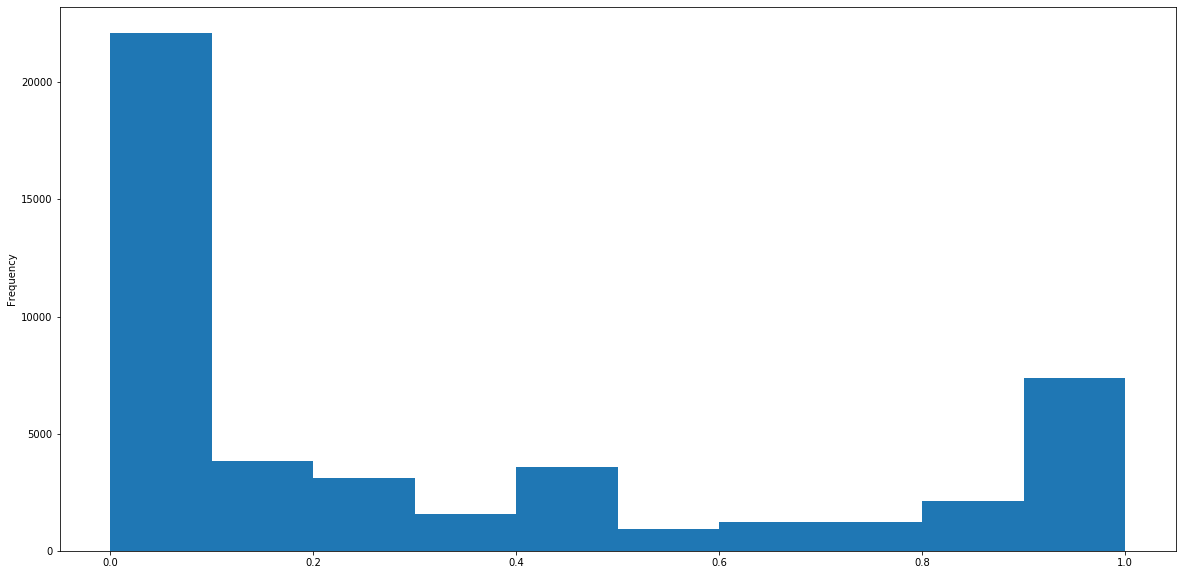

In [58]:
plt = listings_merge.available_year_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>Even in a low season like winter, there seems to be low availability.</p>

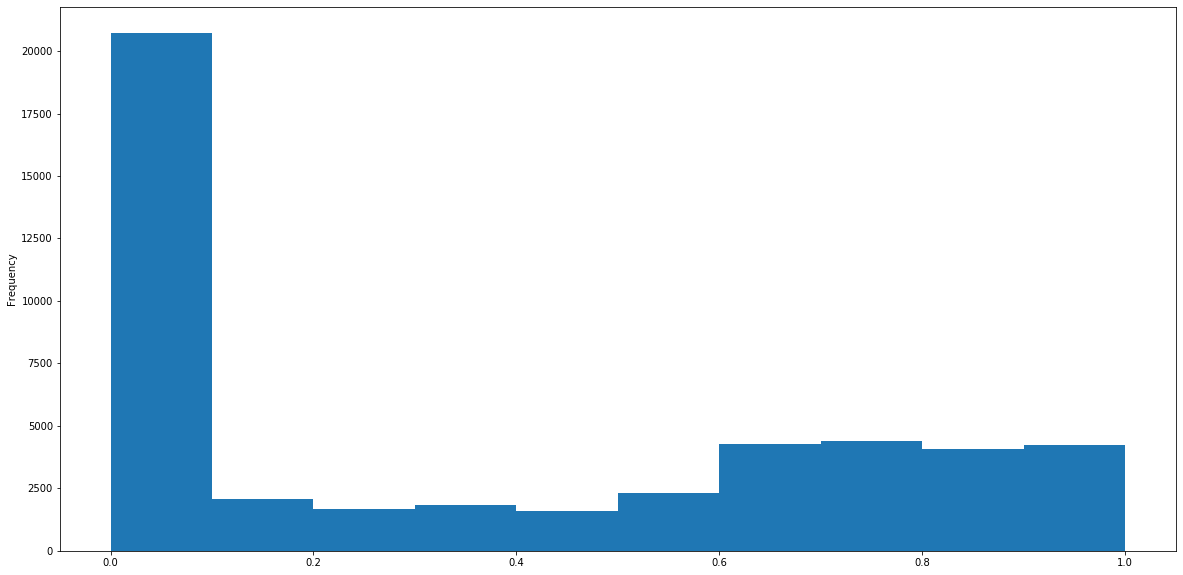

In [59]:
plt = listings_merge.available_winter_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>Plotting the log of the minimum nights required we see that it approximates an exponential distribution.</p>

1.000000     10982
2.000000     10614
3.000000      7123
30.000000     3630
4.000000      2986
             ...  
13.753425        1
7.934247         1
1.945205         1
1.339726         1
21.005479        1
Name: min_nights_year_avg, Length: 1517, dtype: int64
30.000000    3630
7.000000     1860
6.000000      684
14.000000     501
10.000000     446
             ... 
6.906849        1
28.884932       1
25.232877       1
6.347945        1
5.778082        1
Name: min_nights_year_avg, Length: 655, dtype: int64


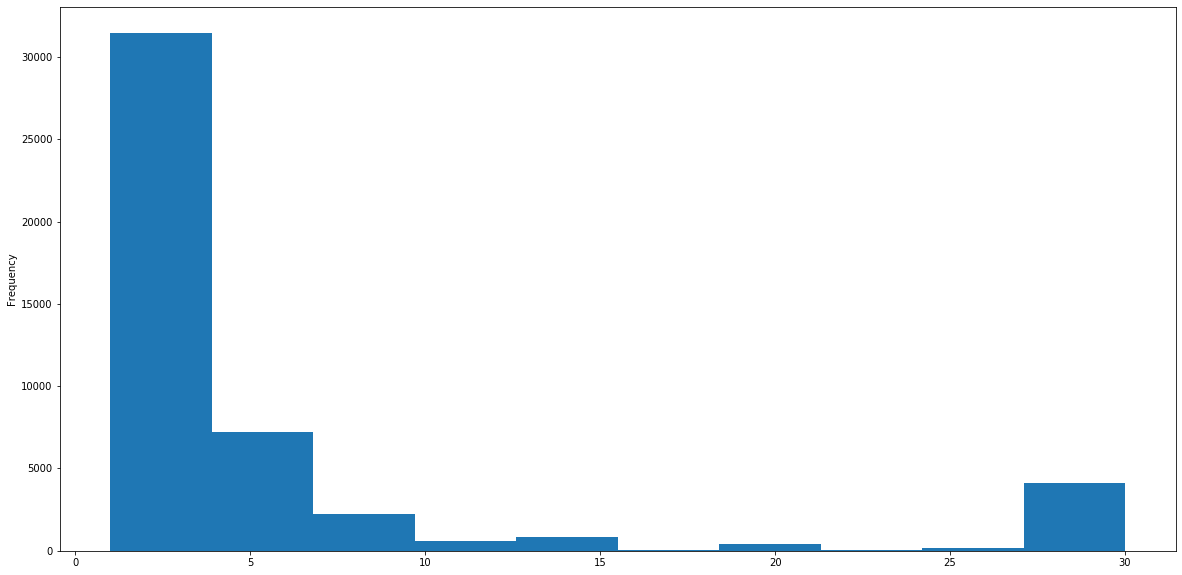

In [60]:
min_nights_75_perc = listings_merge.loc[listings_merge.min_nights_year_avg > 5].min_nights_year_avg.value_counts()
print(listings_merge.min_nights_year_avg.value_counts())
print(min_nights_75_perc)
plt = listings_merge.min_nights_year_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>There isn't much detail in plot of average prices over the year.  We can't plot the log of average prices due to some zero values that need to be cleaned up.</p>

150.000000    893
100.000000    814
200.000000    675
50.000000     551
60.000000     524
             ... 
108.857534      1
154.967123      1
159.232877      1
46.312329       1
39.654795       1
Name: price_year_avg, Length: 23085, dtype: int64
200.000000    675
250.000000    447
300.000000    237
225.000000    169
350.000000    164
             ... 
193.082192      1
322.027397      1
537.660274      1
208.501370      1
186.013699      1
Name: price_year_avg, Length: 6595, dtype: int64


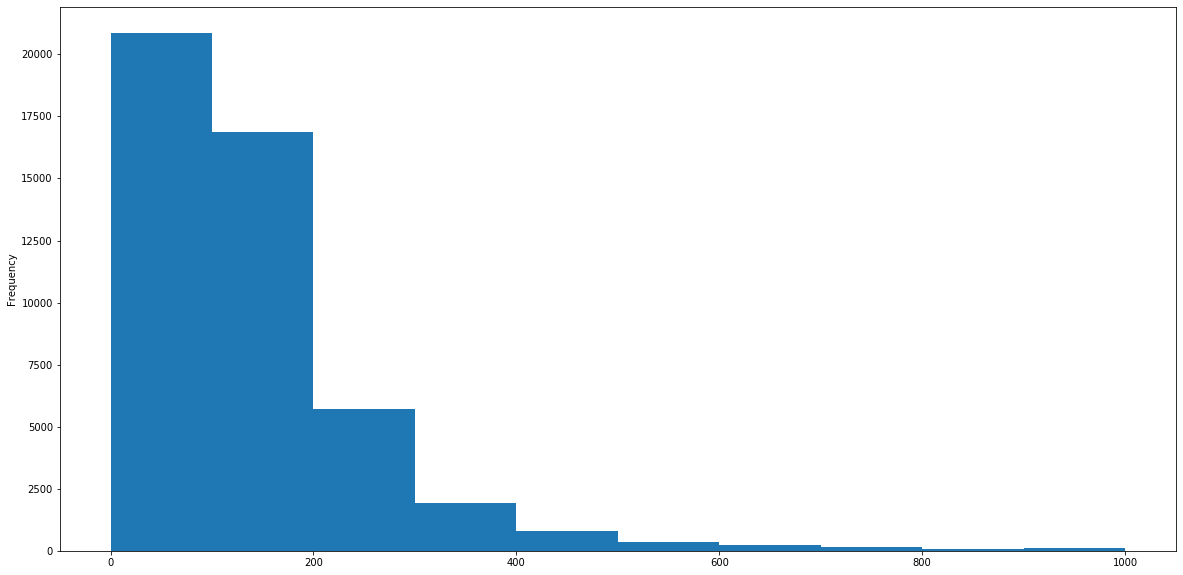

In [61]:
price_75_perc = listings_merge.loc[listings_merge.price_year_avg > 180].price_year_avg.value_counts()
print(listings_merge.price_year_avg.value_counts())
print(price_75_perc)
plt = listings_merge.price_year_avg.plot(kind='hist', figsize=(20, 10))

<br/>
<p>Use a similar method as with the <b>listings_clean</b> table to average over a 200 m radius from listings that have 0, missing, or outlier values for prices.</p>

In [74]:
# print(listings_merge.columns[384], listings_merge.columns[391], listings_merge.columns[4], listings_merge.columns[5])

print(listings_merge.columns[161], listings_merge.columns[168], listings_merge.columns[4], listings_merge.columns[5])

price_year_avg price_dec_avg latitude longitude


<br/>
<p>Similar to how we handled <b>bedrooms</b>, we will average price over 200m radius from listings that have 0 or NaN values.  Again we will not consider <b>room_type</b></p>

In [75]:
# https://gizmodo.com/how-precise-is-one-degree-of-longitude-or-latitude-1631241162
# averaging over approximate radius of 200 m from listings
# that have 0, NaN, or greater than threshold price values

lat_diff = 0.002
long_diff = 0.002
def avg_of_neighbors_2(row, col_name, col_index):
    item = row[col_index]
    lat = row[4]
    long = row[5]
    if math.isnan(item) or item == 0:
        item = listings_merge[col_name].loc[(listings_clean.latitude > lat - lat_diff) \
            & (listings_merge.latitude < lat + lat_diff) \
            & (listings_merge.longitude > long - long_diff) \
            & (listings_merge.longitude < long + long_diff)].groupby(by=listings_merge.neighbourhood).mean().round()[0]
        row[col_index] = item
    return row

listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_year_avg', col_index=161, axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_winter_avg', col_index=162, axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_spring_avg', col_index=163, axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_summer_avg', col_index=164, axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_fall_avg', col_index=165, axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_jan_avg', col_index=166, axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_jun_avg', col_index=167, axis=1)
listings_merge = listings_merge.apply(avg_of_neighbors_2, col_name='price_dec_avg', col_index=168, axis=1)

<br/>
<p>After some cleanup and taking the log of prices averaged over the year, we see an approximate normal distribution.</p>

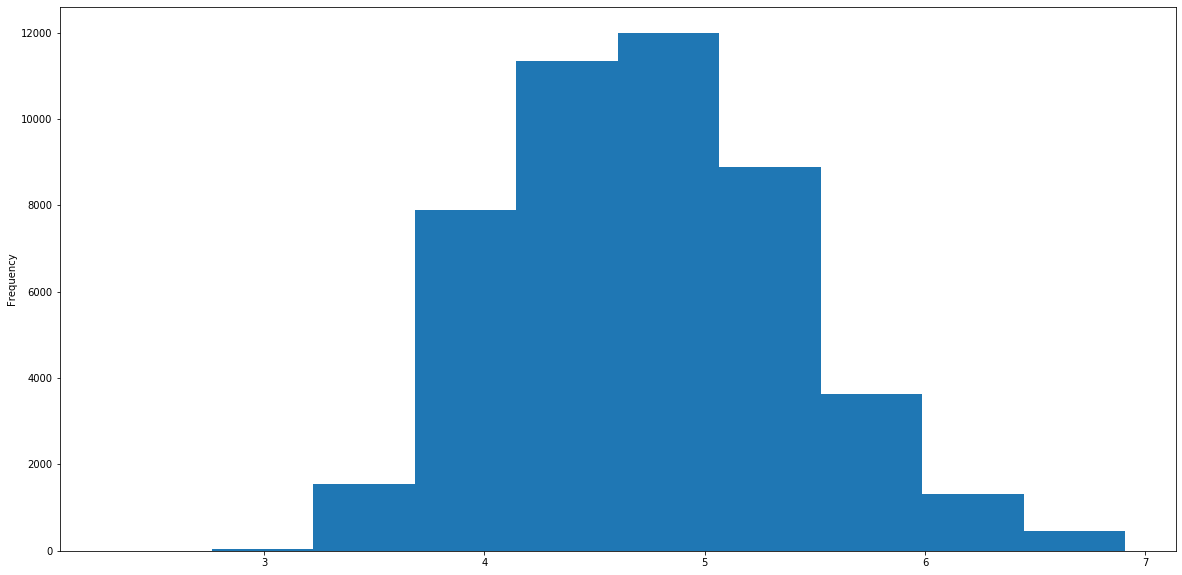

In [76]:
plt = np.log(listings_merge.price_year_avg).plot(kind='hist', figsize=(20, 10))

<br/>
<p>Even after the cleaning process, we find that there is still a missing <b>price_fall_avg</b> value.  Averaging over nearest neighbors didn't catch everything!</p>

In [77]:
listings_merge.info()
listings_merge.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47134 entries, 0 to 48913
Columns: 169 entries, id to price_dec_avg
dtypes: float64(31), int64(133), object(5)
memory usage: 62.4+ MB


id      latitude     longitude  accommodates     bathrooms  \
count  4.713400e+04  47134.000000  47134.000000  47134.000000  47134.000000   
mean   2.103222e+07     40.728482    -73.950377      2.863920      1.135147   
std    1.236688e+07      0.055183      0.047725      1.815014      0.386755   
min    2.595000e+03     40.499790    -74.247870      1.000000      0.000000   
25%    9.926413e+06     40.689023    -73.982410      2.000000      1.000000   
50%    2.109668e+07     40.722285    -73.954680      2.000000      1.000000   
75%    3.213642e+07     40.763100    -73.933742      4.000000      1.000000   
max    4.058402e+07     40.916860    -73.712990     16.000000      5.000000   

           bedrooms          beds  number_of_reviews  review_scores_rating  \
count  47134.000000  47134.000000       47134.000000          47134.000000   
mean       1.173569      1.529618          25.725697             94.000336   
std        0.727232      1.035513          48.180275              7.487219   
min        0.000000      0.000000           0.000000             20.000000   
25%        1.000000      1.000000           1.000000             93.000000   
50%        1.000000      1.000000           6.000000             94.000000   
75%        1.000000      2.000000          27.000000             99.000000   
max       10.000000     12.000000         675.000000            100.000000   

       reviews_per_month  ...  min_nights_jun_avg  min_nights_dec_avg  \
count       38218.000000  ...        47134.000000        47134.000000   
mean            1.418428  ...            5.618383            5.558512   
std             1.680114  ...            8.193094            8.073898   
min             0.010000  ...            1.000000            1.000000   
25%             0.190000  ...            1.533333            1.645161   
50%             0.750000  ...            2.800000            2.709677   
75%             2.150000  ...            5.000000            5.000000   
max            19.950000  ...           30.000000           30.000000   

       price_year_avg  price_winter_avg  price_spring_avg  price_summer_avg  \
count    47134.000000      47134.000000      47134.000000      47134.000000   
mean       143.421665        138.556556        143.602661        145.946891   
std        115.492983        110.213940        117.543871        119.136305   
min         10.000000         10.000000         10.000000         10.000000   
25%         70.000000         68.980556         70.000000         70.000000   
50%        110.000000        106.761111        109.342391        110.000000   
75%        177.750000        174.855556        177.000000        180.000000   
max       1000.000000       1000.000000       1000.000000       1000.000000   

       price_fall_avg  price_jan_avg  price_jun_avg  price_dec_avg  
count    47134.000000   47134.000000   47134.000000   47134.000000  
mean       145.497328     135.532355     146.440235     144.306909  
std        118.855495     108.074091     120.722377     116.890361  
min         10.000000      10.000000      10.000000      10.000000  
25%         70.000000      67.879032      70.000000      70.000000  
50%        110.000000     104.354839     110.000000     110.000000  
75%        180.000000     169.000000     180.000000     179.000000  
max       1000.000000    1000.000000    1000.000000    1000.000000  

[8 rows x 164 columns]

In [78]:
listings_merge_backup = listings_merge

In [79]:
listings_merge = listings_merge_backup

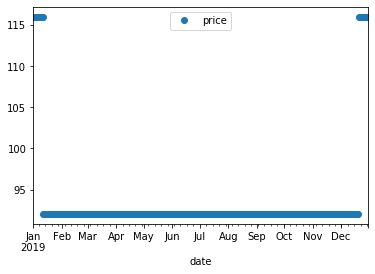

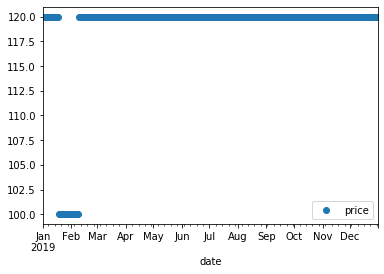

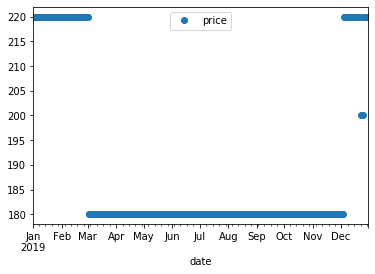

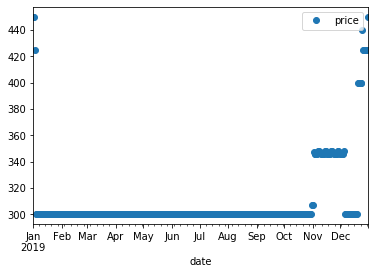

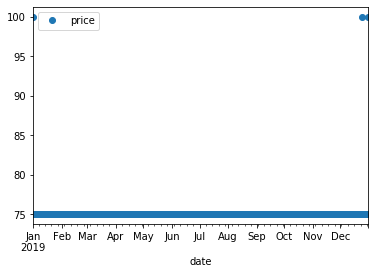

In [80]:
#Bronx 71812, Brooklyn 8490, Manhattan 9657, Queens 45910, Staten Island 225976
# listings_clean.loc[
#     (listings_clean.neighbourhood_group == 'Staten Island') &
#     (listings_clean.room_type == 'Entire home/apt')].head()
listings_ids = [71812, 8490, 9657, 45910, 225976]
for listing_id in listings_ids:
    calendar_clean.loc[calendar_clean.listing_id == listing_id].sort_values(by='date').plot(
        x='date', y='price', style='o'
    )

<br/>
<p>Let's do a final check for any correlated features.</p>

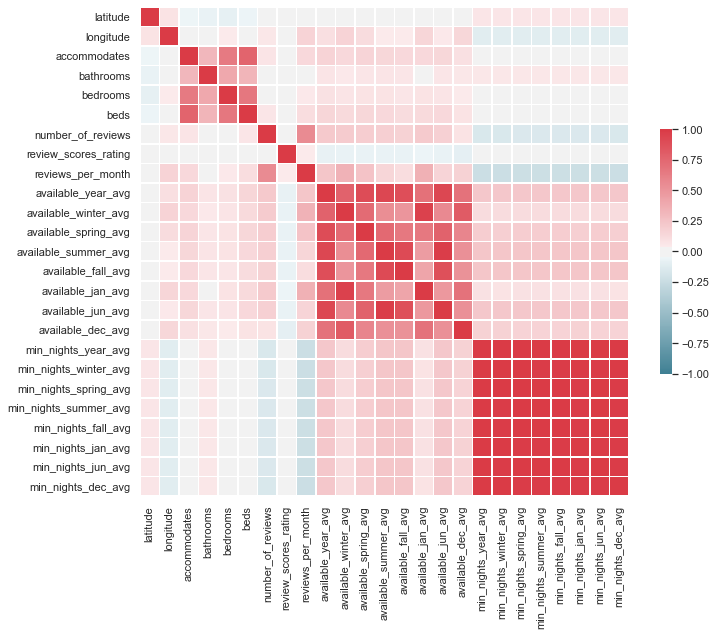

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

features = listings_merge[[
    'summary', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'amenities', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
    'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg', 'available_fall_avg',
    'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
    'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg', 'min_nights_fall_avg',
    'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg'
]]

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(features.corr(), cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<p>We can see that <b>beds</b> and <b>accommodates</b> are heavily correlated with <b>bedrooms</b>.  We can drop those columns.</p>

In [82]:
listings_merge = listings_merge.drop(['beds', 'accommodates'], axis=1)
listings_merge = listings_merge.drop(['id', 'room_type', 'neighbourhood', 'neighbourhood_group'], axis=1)
listings_merge = listings_merge.drop(['reviews_per_month'], axis=1)
listings_merge = listings_merge.drop(['number_of_reviews'], axis=1)
listings_merge = listings_merge.drop(['summary', 'amenities'], axis=1)

listings_merge = listings_merge.drop(['review_scores_rating'], axis=1)
# listings_merge = listings_merge.drop(
#     ['available_year_avg', 'available_winter_avg', 'available_spring_avg',
#      'available_summer_avg', 'available_fall_avg', 'available_jan_avg',
#      'available_jun_avg','available_dec_avg'], axis=1)

In [83]:
X_base = listings_merge.drop([
    'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
    'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
    'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
    'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
    'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
    'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
], axis=1)
X_base.shape

(47134, 134)

<p>Perhaps we can add more features like monthly or holiday averages for availability, minimum nights required, and price, but that would make the table size explode!<p>

<h2>Modeling data with prices as target labels</h2>

<p>Now that we've cleaned up the data, let's look at several possible models of linear and non-linear type.  We will use average price of each listing over the year 2019, as well as seasonal average price as the target labels.  The easiest ones to get started with are Linear Regression and Random Forest.</p>

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
#     ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
#     ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
#     ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
#     ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
#     ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
#     ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
#     ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=.25, random_state=42, shuffle=True)
    print('Target label:', combo[2])
    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    print("Linear regression R^2:", clf.score(X_test, y_test))
    print("Linear regression MAE:", mean_absolute_error(y_test, clf.predict(X_test)))

Target label: price_year_avg
Linear regression R^2: 0.5065996077206961
Linear regression MAE: 50.61395930571375


In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
#     ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
#     ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
#     ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
#     ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
#     ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
#     ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
#     ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=.25, random_state=42, shuffle=True)
    print('Target label:', combo[2])
    
    clf = RandomForestRegressor()
    clf.fit(X_train, y_train)
    print("Random forest R^2:", clf.score(X_test, y_test))
    print("Random forest MAE:", mean_absolute_error(y_test, clf.predict(X_test)))

Target label: price_year_avg
Random forest R^2: 0.6646860932105674
Random forest MAE: 37.57271760176325


<p>We can see that Random Forest performs much better than Linear Regression in terms of R<sup>2</sup> score.</p>

<br/>
<p>Perhaps there will be an incremental improvement in R<sup>2</sup> by using Gradient Boosting (XGBoost in this case).</p>

In [85]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
#     ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
#     ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
#     ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
#     ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
#     ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
#     ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
#     ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=.25, random_state=42, shuffle=True)

    clf = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=0.1,
        max_depth=8,
        n_estimators=200,
        cv=5
    )

    clf.fit(X_train, y_train)
    print('Target label:', combo[2])
    print('Gradient boost R^2:', clf.score(X_test, y_test))
    print('Gradient boost MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

Target label: price_year_avg
Gradient boost R^2: 0.6814499788579074
Gradient boost MAE: 36.60648844156842


<p>We get decent scores from a Gradient Boost model.</p>

<p>Will polynomial regression provide any benefit?  Let's find out.</p>

<p>It's odd that Polynomial Feature Transform + Linear Regresssion has such terrible scores.  Second degree Polynomial Feature Transform + Gradient Boosting performs close to Gradient Boosting alone.</p>

<p>Now apply deep learning with a neural network made up mainly of dense layers.</p>

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

combo_list = [
    ['available_year_avg', 'min_nights_year_avg', 'price_year_avg'],
#     ['available_winter_avg', 'min_nights_winter_avg', 'price_winter_avg'],
#     ['available_spring_avg', 'min_nights_spring_avg', 'price_spring_avg'],
#     ['available_summer_avg', 'min_nights_summer_avg', 'price_summer_avg'],
#     ['available_fall_avg', 'min_nights_fall_avg', 'price_fall_avg'],
#     ['available_jan_avg', 'min_nights_jan_avg', 'price_jan_avg'],
#     ['available_jun_avg', 'min_nights_jun_avg', 'price_jun_avg'],
#     ['available_dec_avg', 'min_nights_dec_avg', 'price_dec_avg']
]

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)
adam = Adam(lr=0.001)
sgd = SGD(lr=0.001)

def base_model():
    model = Sequential()
    model.add(Dense(200, input_dim=136, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mae'])
    return model

for combo in combo_list:
    X_base = listings_merge.drop([
        'price_year_avg', 'price_winter_avg', 'price_spring_avg', 'price_summer_avg', 'price_fall_avg',
        'price_jan_avg', 'price_jun_avg', 'price_dec_avg',
        'available_year_avg', 'available_winter_avg', 'available_spring_avg', 'available_summer_avg',
        'available_fall_avg', 'available_jan_avg', 'available_jun_avg', 'available_dec_avg',
        'min_nights_year_avg', 'min_nights_winter_avg', 'min_nights_spring_avg', 'min_nights_summer_avg',
        'min_nights_fall_avg', 'min_nights_jan_avg', 'min_nights_jun_avg', 'min_nights_dec_avg',
    ], axis=1)
    X_base[combo[0]] = listings_merge[combo[0]]
    X_base[combo[1]] = listings_merge[combo[1]]
    y = listings_merge[combo[2]]
    
    scaler = MinMaxScaler()
    X_scale = scaler.fit_transform(X_base.values)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=.25, random_state=42, shuffle=True)

    
    clf = KerasRegressor(build_fn=base_model, epochs=100, batch_size=50, verbose=0, callbacks=[es])
#     kfold = KFold(n_splits=5)
#     results = cross_val_score(clf, X_train, y_train, cv=kfold)
#     print(results)

    clf.fit(X_train, y_train)
    print('Target label:', combo[2])
    print('Neural network MAE:', mean_absolute_error(y_test, clf.predict(X_test)))

Epoch 00044: early stopping
Target label: price_year_avg
Neural network MAE: 45.44523187723677


<p>The best mean absolute error for average nightly price that can be achieved so far is around 42.  The mean of the average nightly price over the year is around 143.</p>